# Kaggle API


In [ ]:
#!rm -r /root/.kaggle

In [1]:
#! mkdir ~/.kaggle

In [2]:
#! cp kaggle.json ~/.kaggle

In [3]:
#! chmod 600 ~/.kaggle/kaggle.json

In [4]:
#! kaggle datasets download -d jangedoo/utkface-new

 99% 329M/331M [00:16<00:00, 24.1MB/s]
100% 331M/331M [00:16<00:00, 21.4MB/s]


In [5]:
#! unzip utkface-new.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_201701

In [ ]:
#! kaggle datasets list

# GPU

In [1]:
import tensorflow as tf

In [2]:
device_list = tf.test.gpu_device_name()

device_list

''

In [3]:
!nvidia-smi

Tue May  9 16:43:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.02       Driver Version: 528.02       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:06:00.0  On |                  N/A |
| 28%   39C    P0    17W / 100W |    677MiB /  4096MiB |      5%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Packages

In [6]:
import numpy as np
import pandas as pd 
import os
import cv2
from sklearn.svm import SVC
from skimage.feature import hog
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from skimage.color import rgb2gray
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.applications import VGG16
from skimage.feature import hog
from skimage import data, exposure
import random
from keras import layers, losses
from keras.models import Model
from sklearn.metrics import classification_report, accuracy_score, matthews_corrcoef, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import math
from keras.utils.np_utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

# Functions

In [168]:
def display(img):
    plt.imshow(img)
    plt.show()


def prediction_metrics_age(model, X_test, y_test, classes):
    preds = []
    truth = []
    y_hat = model.predict(X_test)

    for i in range(X_test.shape[0]):
        
        predict_index = np.argmax(y_hat[i])
        preds.append(predict_index) 
        
        true_index = np.argmax(y_test[i])
        truth.append(true_index)
        
    mcc = matthews_corrcoef(truth, preds)
    print("MCC: ", mcc)
    label = list(set(classes))
    cm = confusion_matrix(truth, preds)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=label, yticklabels=label)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(classification_report(truth, preds))


def prediction_metrics_gender(model, X_test, y_test, classes):
  y_hat = model.predict(X_test)
  y_hat = np.round(y_hat)   

  mcc = matthews_corrcoef(y_test, y_hat)
  print("MCC: ", mcc)
  label = list(set(classes))
  cm = confusion_matrix(y_test, y_hat)
  sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=label, yticklabels=label)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Confusion Matrix')
  plt.show()
  print(classification_report(y_test, y_hat))
  
def loss_plot(history, fig_width=12, fig_height=6):
    # Create a new figure with the specified width and height
    plt.figure(figsize=(fig_width, fig_height))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Load Balanced Data

## Age Classes

In [105]:
#age_classes_vars = np.load('../../../data_project/new_data/age_classes_vars.npz')
age_classes_vars = np.load('/content/drive/MyDrive/new_data/content/new_data/age_calsses_vars.npz')

X_age_classes = age_classes_vars['x']
y_age_classes = age_classes_vars['y']

print(X_age_classes.shape)
print(len(y_age_classes))

(3480, 200, 200, 3)
3480


In [106]:
age_categories = to_categorical(y_age_classes, num_classes=6)

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

## Genders

In [142]:
gender_vars = np.load('/content/drive/MyDrive/new_data/content/new_data/age_calsses_vars.npz')
#gender_vars = np.load('../../../data_project/new_data/gender_vars.npz')

X_genders = gender_vars['x']
y_genders = gender_vars['y']

print(X_genders.shape)
print(len(y_genders))

(20000, 200, 200, 3)
20000


In [ ]:
perm = np.random.permutation(len(X_genders))
X_genders = X_genders[perm]
y_genders = y_genders[perm]

#use only a portion of the shuffled arrays for the train-test split
X_genders = reduced_X_genders[:10000]
y_genders = reduced_y_genders[:10000]

# MODELS

## BASE

In [143]:
def CNN (input_shape, output, activation):
    
    model = tf.keras.Sequential()

    
    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape = input_shape)) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
 

    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))


    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    
    model.add(tf.keras.layers.Dropout(0.5))
    
    model.add(tf.keras.layers.Dense(output, activation=activation))
    
    model.summary()
    
    return model

#otimizar 2k
#adicionar mais conv?
#Dropout antes do flaten apenas
#Mexer otimizador (lr)
#implementar early stoping (). Early Stoping tem patience: e.g., 10 epcohs, ele espera 10 epochs antes de parar.
#ir gravando cnn no servidor

### Gender

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X_genders, y_genders, test_size=0.2, random_state=42)

In [146]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [147]:
model = CNN((200,200,3), 1, 'sigmoid')

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 100, 100, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 25, 25, 64)     

In [148]:
#for age use categorical_crossentropy instead
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

history_base_gender = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/2
13/13 [==============================] - 22s 687ms/step - loss: 0.8004 - accuracy: 0.5350 - val_loss: 0.6878 - val_accuracy: 0.4800
Epoch 2/2
13/13 [==============================] - 6s 443ms/step - loss: 0.6827 - accuracy: 0.5600 - val_loss: 0.6589 - val_accuracy: 0.5800


4/4 [==============================] - 1s 84ms/step
MCC:  0.32025630761017426


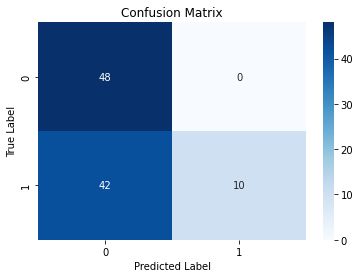

              precision    recall  f1-score   support

           0       0.53      1.00      0.70        48
           1       1.00      0.19      0.32        52

    accuracy                           0.58       100
   macro avg       0.77      0.60      0.51       100
weighted avg       0.78      0.58      0.50       100



In [149]:
prediction_metrics_gender(model, X_test, y_test, y_genders)

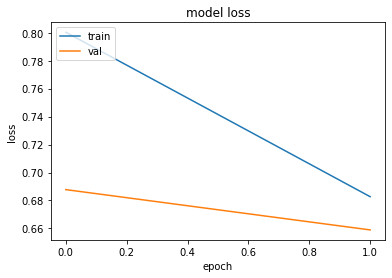

In [152]:
loss_plot (history_base_gender)

### Age

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_age_classes, age_categories, test_size = 0.2, shuffle = True)

In [73]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [74]:
model = CNN((200,200,3), 6, 'softmax')

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 100, 100, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 25, 25, 64)     

In [75]:
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

history_base_age = model.fit(X_train, y_train,
        batch_size=32,
        epochs=20,
        validation_data=(X_test, y_test),)

Epoch 1/2
87/87 [==============================] - 39s 425ms/step - loss: 1.8006 - accuracy: 0.2055 - val_loss: 1.6654 - val_accuracy: 0.3578
Epoch 2/2
87/87 [==============================] - 35s 399ms/step - loss: 1.5305 - accuracy: 0.3596 - val_loss: 1.3091 - val_accuracy: 0.4526


22/22 [==============================] - 2s 103ms/step
MCC:  0.3622310291762673


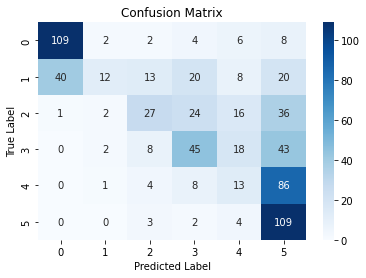

              precision    recall  f1-score   support

           0       0.73      0.83      0.78       131
           1       0.63      0.11      0.18       113
           2       0.47      0.25      0.33       106
           3       0.44      0.39      0.41       116
           4       0.20      0.12      0.15       112
           5       0.36      0.92      0.52       118

    accuracy                           0.45       696
   macro avg       0.47      0.44      0.39       696
weighted avg       0.48      0.45      0.41       696



In [76]:
prediction_metrics_age(model, X_test, y_test, y_age_classes)

In [ ]:
loss_plot (history_base_age)

## HOG

### Gender

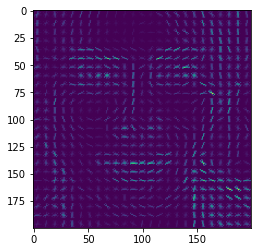

In [155]:
image_check = X_genders[25]

# define HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

# compute HOG features and visualize them
hog_features, hog_image = hog(image_check, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, visualize=True,channel_axis=2)



# rescale image intensity for better visualization
#hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# display HOG features
plt.imshow(hog_image)
plt.show()

In [156]:
hog_features = []
for img in X_genders:
    hog_feature = hog(img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, channel_axis=2)
    
    hog_features.append(hog_feature)
hog_features = np.array(hog_features)

In [157]:
cnn = Sequential()

#tratado
cnn.add(layers.Reshape((144, 144, 1), input_shape=(20736,)))
#cnn.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=X_train[1].shape))


cnn.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(Flatten())

cnn.add(Dense(64, activation='relu'))

cnn.add(layers.Dropout(0.5))

#output layer with 2 filters for number of classes the model will choose to do predictions
#and since gender is just binary classification sigmoid is appropriate
#when doing classification for age (wont be binary classification) then softmax is good choice
cnn.add(Dense(1, activation='sigmoid'))

cnn.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_5 (Reshape)         (None, 144, 144, 1)       0         
                                                                 
 conv2d_53 (Conv2D)          (None, 144, 144, 16)      160       
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 72, 72, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 36, 36, 64)      

In [159]:
X_train, X_test, y_train, y_test = train_test_split(hog_features, y_genders, test_size=0.2, random_state=42)

In [160]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [161]:
cnn.compile(optimizer="adam", loss="binary_crossentropy",
            metrics=['accuracy'])

history_hog_gender = cnn.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/2
3/3 [==============================] - 3s 563ms/step - loss: 0.7011 - accuracy: 0.5250 - val_loss: 0.7034 - val_accuracy: 0.5500
Epoch 2/2
3/3 [==============================] - 1s 202ms/step - loss: 0.6645 - accuracy: 0.6250 - val_loss: 0.6888 - val_accuracy: 0.5500


1/1 [==============================] - 0s 164ms/step
MCC:  0.0


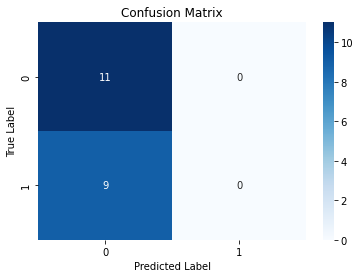

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        11
           1       0.00      0.00      0.00         9

    accuracy                           0.55        20
   macro avg       0.28      0.50      0.35        20
weighted avg       0.30      0.55      0.39        20



c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [163]:
prediction_metrics_gender(cnn, X_test, y_test, y_genders)

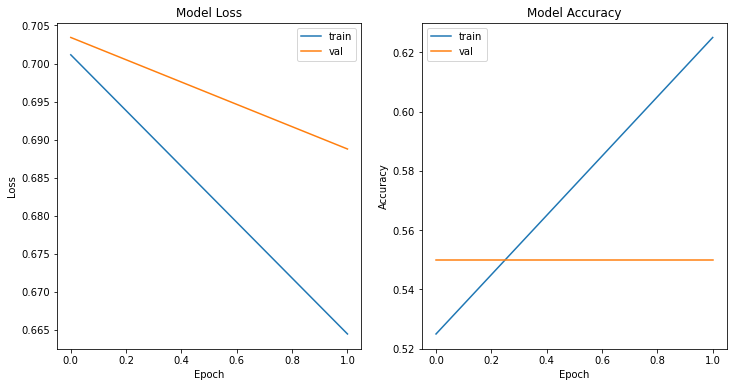

In [169]:
loss_plot (history_hog_gender)

### Age

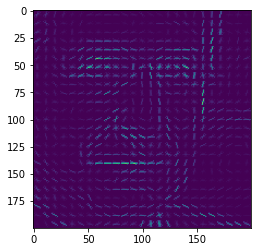

In [77]:
image_check = X_age_classes[25]

# define HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

# compute HOG features and visualize them
hog_features, hog_image = hog(image_check, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, visualize=True,channel_axis=2)



# rescale image intensity for better visualization
#hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# display HOG features
plt.imshow(hog_image)
plt.show()

In [78]:
hog_features = []
for img in X_age_classes:

    hog_feature = hog(img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, channel_axis=2)
    
    hog_features.append(hog_feature)
hog_features = np.array(hog_features)

In [83]:
cnn = Sequential()

cnn.add(layers.Reshape((144, 144, 1), input_shape=(20736,)))
#cnn.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=X_train[1].shape))

cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))

cnn.add(layers.MaxPooling2D(2,2))
cnn.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))

cnn.add(layers.MaxPooling2D(2,2))

cnn.add(Flatten())

cnn.add(Dense(64, activation='relu'))

cnn.add(layers.Dropout(0.2))

#output layer with 2 filters for number of classes the model will choose to do predictions
#and since gender is just binary classification sigmoid is appropriate
#when doing classification for age (wont be binary classification) then softmax is good choice
cnn.add(Dense(6, activation='softmax'))

cnn.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 144, 144, 1)       0         
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 72, 72, 1)        0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 72, 72, 32)        320       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 36, 36, 64)        18496     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 18, 18, 64)     

In [80]:
X_train, X_test, y_train, y_test = train_test_split(hog_features, age_categories, test_size = 0.2,shuffle = True)

In [81]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [84]:
cnn.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

history_hog_age = cnn.fit(X_train, y_train,
        batch_size=32,
        epochs=20,
        validation_data=(X_test, y_test),)

Epoch 1/2
3/3 [==============================] - 1s 185ms/step - loss: 1.8420 - accuracy: 0.1375 - val_loss: 1.7846 - val_accuracy: 0.2000
Epoch 2/2
3/3 [==============================] - 0s 104ms/step - loss: 1.7776 - accuracy: 0.2375 - val_loss: 1.7775 - val_accuracy: 0.2000


1/1 [==============================] - 0s 116ms/step
MCC:  0.0


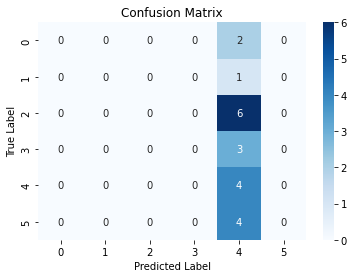

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         3
           4       0.20      1.00      0.33         4
           5       0.00      0.00      0.00         4

    accuracy                           0.20        20
   macro avg       0.03      0.17      0.06        20
weighted avg       0.04      0.20      0.07        20



c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
prediction_metrics_age(cnn, X_test, y_test, y_age_classes)

In [ ]:
loss_plot (history_hog_age)

## ORB

### Gender 

In [173]:
orb_X_genders = []
for img in X_genders:
    img = img * 255.0
    orb_X_genders.append(img)

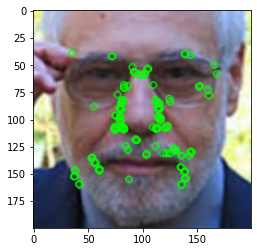

In [175]:
image_check = orb_X_genders[1]
image_check = cv2.convertScaleAbs(image_check)
orb_X_genders = [cv2.convertScaleAbs(img) for img in orb_X_genders]

orb = cv2.ORB_create()

kp = orb.detect(image_check, None)

kp, des = orb.compute(image_check, kp)

img2 = cv2.drawKeypoints(image_check, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2)
plt.show()

In [176]:
orb = cv2.ORB_create()
# define minimum and maximum keypoints
MIN_KEYPOINTS = 100
orb_features = []
orb_genders = []

# loop over images and keypoints
for i, img in enumerate(orb_X_genders):
    keypoints, descriptors = orb.detectAndCompute(img, None)
    keypoints, descriptors = orb.compute(image_check, keypoints)
    keypoints = list(keypoints)    
    # check if number of keypoints is between min and max
    if len(keypoints) < MIN_KEYPOINTS:
        continue
        
    # remove extra keypoints randomly
    while len(keypoints) > MIN_KEYPOINTS:
        idx = random.randint(0, len(keypoints)-1)
        keypoints.pop(idx)
        descriptors = np.delete(descriptors, idx, axis=0)
        
    # add descriptors to feature list
    orb_features.append(np.ndarray.flatten(descriptors))
    orb_genders.append(y_genders[i])
 
mean = np.mean(orb_features, axis=0)
std = np.std(orb_features, axis=0)
orb_features_norm = (orb_features - mean) / std

In [177]:
X_train, X_test, y_train, y_test = train_test_split(orb_features_norm, orb_genders, test_size=0.20, random_state=42)

In [178]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [179]:
cnn = Sequential()

# Input shape is (3200,)
cnn.add(layers.Reshape((50, 64, 1), input_shape=X_train[0].shape))

cnn.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))

cnn.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))

cnn.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))

cnn.add(Flatten())
cnn.add(layers.Dense(64, activation='relu'))

cnn.add(layers.Dropout(0.5))

cnn.add(layers.Dense(1, activation='sigmoid'))

cnn.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_6 (Reshape)         (None, 50, 64, 1)         0         
                                                                 
 conv2d_56 (Conv2D)          (None, 50, 64, 16)        160       
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 25, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 25, 32, 32)        4640      
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 12, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 12, 16, 64)      

In [180]:
cnn.compile(optimizer="adam", loss="binary_crossentropy",
            metrics=['accuracy'])

history_orb_gender = cnn.fit(X_train, y_train,
                        epochs=20,
                        batch_size=32,
                        validation_data=(X_test, y_test))

Epoch 1/2
2/2 [==============================] - 2s 393ms/step - loss: 0.7410 - accuracy: 0.6154 - val_loss: 0.5890 - val_accuracy: 0.7143
Epoch 2/2
2/2 [==============================] - 0s 98ms/step - loss: 0.7272 - accuracy: 0.5192 - val_loss: 0.6513 - val_accuracy: 0.7143


1/1 [==============================] - 0s 141ms/step
MCC:  0.0


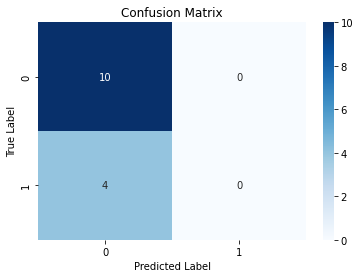

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       0.00      0.00      0.00         4

    accuracy                           0.71        14
   macro avg       0.36      0.50      0.42        14
weighted avg       0.51      0.71      0.60        14



c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [181]:
prediction_metrics_gender(cnn, X_test, y_test, orb_genders)

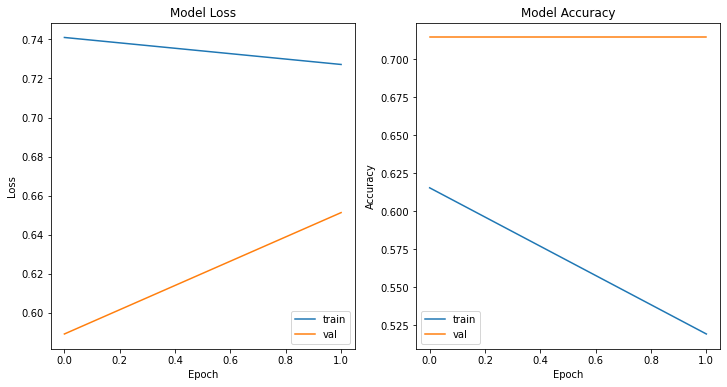

In [182]:
loss_plot (history_orb_gender)

### Age

In [111]:
orb_X_age_classes = []
for img in X_age_classes:
    img = img * 255.0
    orb_X_age_classes.append(img)

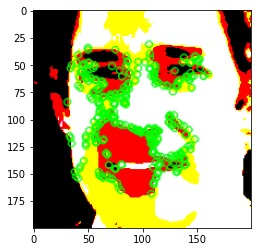

In [112]:
image_check = orb_X_age_classes[1]
image_check = cv2.convertScaleAbs(image_check)
orb_X_age_classes = [cv2.convertScaleAbs(img) for img in orb_X_age_classes]

orb = cv2.ORB_create()

kp = orb.detect(image_check, None)

kp, des = orb.compute(image_check, kp)

img2 = cv2.drawKeypoints(image_check, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2)
plt.show()

In [118]:
orb = cv2.ORB_create()
# define minimum and maximum keypoints
MIN_KEYPOINTS = 100
orb_features = []
#orb_genders = []
orb_ages = []

# loop over images and keypoints
for i, img in enumerate(orb_X_age_classes):
    keypoints, descriptors = orb.detectAndCompute(img, None)
    keypoints, descriptors = orb.compute(image_check, keypoints)
    keypoints = list(keypoints)    
    # check if number of keypoints is between min and max
    if len(keypoints) < MIN_KEYPOINTS:
        continue
        
    # remove extra keypoints randomly
    while len(keypoints) > MIN_KEYPOINTS:
        idx = random.randint(0, len(keypoints)-1)
        keypoints.pop(idx)
        descriptors = np.delete(descriptors, idx, axis=0)
        
    # add descriptors to feature list
    orb_features.append(np.ndarray.flatten(descriptors))
    #orb_genders.append(y_genders[i])
    orb_ages.append(age_categories[i])

mean = np.mean(orb_features, axis=0)
std = np.std(orb_features, axis=0)
orb_features_norm = (orb_features - mean) / std

In [119]:
X_train, X_test, y_train, y_test = train_test_split(orb_features_norm, orb_ages, test_size=0.20, random_state=42)

In [120]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [121]:
cnn = Sequential()

# Input shape is (3200,)
cnn.add(layers.Reshape((50, 64, 1), input_shape=X_train[0].shape))


cnn.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))

cnn.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))

cnn.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))

cnn.add(Flatten())

cnn.add(layers.Dense(64, activation='relu'))

cnn.add(layers.Dropout(0.5))

cnn.add(layers.Dense(6, activation='softmax'))

#cnn.summary()

In [122]:
cnn.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

history_orb_age = cnn.fit(X_train, y_train,
                        epochs=20,
                        batch_size=32,
                        validation_data=(X_test, y_test))


Epoch 1/2
3/3 [==============================] - 2s 148ms/step - loss: 0.6219 - accuracy: 0.1053 - val_loss: 0.4642 - val_accuracy: 0.2000
Epoch 2/2
3/3 [==============================] - 0s 52ms/step - loss: 0.5326 - accuracy: 0.1711 - val_loss: 0.4584 - val_accuracy: 0.1000


1/1 [==============================] - 0s 142ms/step
MCC:  -0.1315903389919538


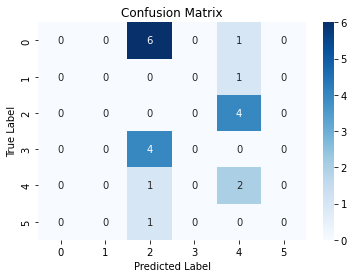

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         4
           4       0.25      0.67      0.36         3
           5       0.00      0.00      0.00         1

    accuracy                           0.10        20
   macro avg       0.04      0.11      0.06        20
weighted avg       0.04      0.10      0.05        20



c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
prediction_metrics_age(cnn, X_test, y_test, y_age_classes)

In [ ]:
loss_plot (history_orb_age)

## VGG 16

### Gender

In [1]:
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

for layer in VGG_model.layers:
	layer.trainable = False
	
X = np.stack(X_genders)
X = VGG_model.predict(X)

NameError: name 'VGG16' is not defined

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y_genders, test_size=0.2, random_state=42)

In [60]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [61]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape = (6, 6, 512))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))



model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))


model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))


model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 6, 6, 16)          73744     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 3, 3, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 3, 3, 32)          4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 1, 1, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 1, 1, 64)          18496     
                                                                 
 flatten_6 (Flatten)         (None, 64)               

In [62]:
#for age use categorical_crossentropy instead
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

history_VGG16_gender = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/25
313/313 [==============================] - 4s 7ms/step - loss: 0.4556 - accuracy: 0.7773 - val_loss: 0.4095 - val_accuracy: 0.8048
Epoch 2/25
313/313 [==============================] - 2s 5ms/step - loss: 0.3045 - accuracy: 0.8746 - val_loss: 0.2933 - val_accuracy: 0.8568
Epoch 3/25
313/313 [==============================] - 2s 5ms/step - loss: 0.2617 - accuracy: 0.8929 - val_loss: 0.2730 - val_accuracy: 0.8836
Epoch 4/25
313/313 [==============================] - 2s 5ms/step - loss: 0.2315 - accuracy: 0.9074 - val_loss: 0.2961 - val_accuracy: 0.8736
Epoch 5/25
313/313 [==============================] - 2s 5ms/step - loss: 0.2063 - accuracy: 0.9188 - val_loss: 0.3001 - val_accuracy: 0.8688
Epoch 6/25
313/313 [==============================] - 2s 5ms/step - loss: 0.1876 - accuracy: 0.9283 - val_loss: 0.3115 - val_accuracy: 0.8772
Epoch 7/25
313/313 [==============================] - 2s 5ms/step - loss: 0.1593 - accuracy: 0.9416 - val_loss: 0.3176 - val_accuracy: 0.8692
Epoch 

79/79 [==============================] - 0s 2ms/step
MCC:  0.7496360361538621


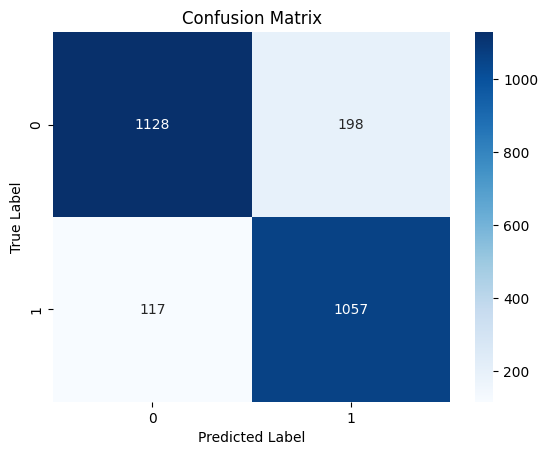

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1326
           1       0.84      0.90      0.87      1174

    accuracy                           0.87      2500
   macro avg       0.87      0.88      0.87      2500
weighted avg       0.88      0.87      0.87      2500



In [63]:
prediction_metrics_gender(model, X_test, y_test, genders)

In [ ]:
loss_plot (history_VGG16_gender)

### Age

In [ ]:
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

for layer in VGG_model.layers:
	layer.trainable = False
	
X = np.stack(X_age_classes)
X = VGG_model.predict(X)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, age_categories, test_size=0.2, random_state=42)

In [128]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape = (6, 6, 512))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))



model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))


model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))


model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(6, activation='softmax'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 6, 6, 16)          73744     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 3, 3, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 3, 3, 32)          4640      
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 1, 1, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 1, 1, 64)          18496     
                                                                 
 flatten_14 (Flatten)        (None, 64)              

In [129]:
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

history_VGG16_age = model.fit(X_train, y_train,
        batch_size=32,
        epochs=2,
        validation_data=(X_test, y_test),)

Epoch 1/2
3/3 [==============================] - 1s 115ms/step - loss: 1.8015 - accuracy: 0.1500 - val_loss: 1.7696 - val_accuracy: 0.1500
Epoch 2/2
3/3 [==============================] - 0s 30ms/step - loss: 1.7478 - accuracy: 0.2375 - val_loss: 1.7684 - val_accuracy: 0.1500


1/1 [==============================] - 0s 90ms/step
MCC:  0.0


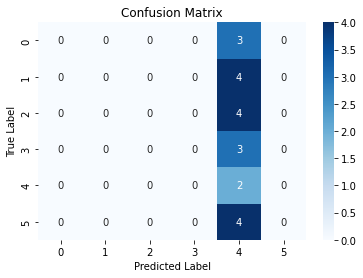

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3
           4       0.10      1.00      0.18         2
           5       0.00      0.00      0.00         4

    accuracy                           0.10        20
   macro avg       0.02      0.17      0.03        20
weighted avg       0.01      0.10      0.02        20



c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
prediction_metrics_age(model, X_test, y_train, y_age_classes)

In [ ]:
loss_plot (history_VGG16_age)

## Autoencoder

### Gender

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_genders, y_genders, test_size=0.2, random_state=42)

X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 3))

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 3))

In [69]:
# binary cross entropy is good for imagprint("Autoencoder Started")
#### AUtoencoder
input = layers.Input(shape=(200, 200, 3))

#valor alto apanha artefactos, e valor baixo nao captura bem as features da imagem
latent_dim = 2000

## Classe 

# Encoder

#didnt increase filter count in encoder and decrease equally in decoder because
#it can lead to overfitting

x = layers.Conv2D(64, (3,3), activation='relu', padding='same', strides = 2)(input)
#x = layers.MaxPooling2D((2,2), padding='same')(x)#dividir imagem por factor de 2
x = layers.Conv2D(32, (3,3), activation='relu', padding='same', strides = 2)(x)#reduziu se nr de filtros para 32 porque foi decidido factor de 32 filtros
#x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(16, (3,3), activation='relu', padding='same', strides = 2)(x)
#x = layers.MaxPooling2D((2,2), padding='same')(x)#25*25*16=10000
x = layers.Flatten()(x)
enc = layers.Dense(latent_dim, activation='relu')(x)

# Decoder

#having conv2D here helps to avoid checkerboard artifacts
#which are alternating points of colors (like checkerboard)
#that are consequence of deconvolutioning an image and cause 
#loss of quality in final reconstruction
#x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(x)

#equivalente a fazer dense layer no fim do encoder e no inicio do decoder
#fazer a layer dense fica um vector
#fazer reshape depois do 2 dense para voltar a ter imagem do vetor criado

x = layers.Dense(25*25*16, activation='relu')(enc)
x = layers.Reshape((25,25,16))(x)
#x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2DTranspose(32, (3, 3), activation="relu", padding="same", strides = 2)(x)
#x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2DTranspose(64, (3,3), activation='relu', padding='same', strides = 2)(x)
#x = layers.UpSampling2D((2,2))(x)
output = layers.Conv2DTranspose(3, (3,3), activation='sigmoid', padding='same', strides = 2)(x)

#maybe use strides in the layers too
#example:
#x = layers.Conv2D(16, (3,3), activation='relu', padding='same', strides = 2)(x)

# Autoencoder
autoencoder = Model(input, output)

# binary cross entropy is good for image feature extraction especially when images are normalized
autoencoder.compile(optimizer="adam", loss="binary_crossentropy",
            metrics=['accuracy'])

autoencoder.summary()#e feature extraction especially when images are normalized


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_23 (Conv2D)          (None, 100, 100, 64)      1792      
                                                                 
 conv2d_24 (Conv2D)          (None, 50, 50, 32)        18464     
                                                                 
 conv2d_25 (Conv2D)          (None, 25, 25, 16)        4624      
                                                                 
 flatten_8 (Flatten)         (None, 10000)             0         
                                                                 
 dense_16 (Dense)            (None, 2000)              20002000  
                                                                 
 dense_17 (Dense)            (None, 10000)             200100

In [70]:
#using validation_data is good for detecting overfitting as 
#it does early stopping when the performance is no longer improving

autoencoder.fit(x = X_train, 
                y = X_train,
                epochs = 20,
                shuffle = True,
                batch_size = 32,
                validation_data = (X_test, X_test),)

Epoch 1/25
313/313 [==============================] - 13s 31ms/step - loss: 0.6072 - accuracy: 0.9227 - val_loss: 0.5740 - val_accuracy: 0.9220
Epoch 2/25
313/313 [==============================] - 6s 21ms/step - loss: 0.5683 - accuracy: 0.9230 - val_loss: 0.5653 - val_accuracy: 0.9167
Epoch 3/25
313/313 [==============================] - 7s 21ms/step - loss: 0.5622 - accuracy: 0.9204 - val_loss: 0.5616 - val_accuracy: 0.9192
Epoch 4/25
313/313 [==============================] - 7s 21ms/step - loss: 0.5593 - accuracy: 0.9203 - val_loss: 0.5594 - val_accuracy: 0.9208
Epoch 5/25
313/313 [==============================] - 7s 21ms/step - loss: 0.5572 - accuracy: 0.9225 - val_loss: 0.5579 - val_accuracy: 0.9237
Epoch 6/25
313/313 [==============================] - 7s 21ms/step - loss: 0.5558 - accuracy: 0.9243 - val_loss: 0.5569 - val_accuracy: 0.9242
Epoch 7/25
313/313 [==============================] - 6s 21ms/step - loss: 0.5548 - accuracy: 0.9255 - val_loss: 0.5558 - val_accuracy: 0.928

In [71]:
new_model = Model(input, enc)

encoded_train = new_model.predict(X_train)
encoded_test = new_model.predict(X_test)

encoded_train = np.asarray(encoded_train)
y_train = np.asarray(y_train)

encoded_test = np.asarray(encoded_test)
y_test = np.asarray(y_test)

79/79 [==============================] - 0s 5ms/step


In [72]:
cnn = Sequential()

# Input shape is (2000,)
cnn.add(layers.Reshape((40, 50, 1), input_shape=encoded_train[0].shape))

cnn.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(Flatten())

cnn.add(Dense(64, activation='relu'))

cnn.add(layers.Dropout(0.5))

#output layer with 2 filters for number of classes the model will choose to do predictions
#and since gender is just binary classification sigmoid is appropriate
#when doing classification for age (wont be binary classification) then softmax is good choice
cnn.add(Dense(1, activation='sigmoid'))

cnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_5 (Reshape)         (None, 40, 50, 1)         0         
                                                                 
 conv2d_26 (Conv2D)          (None, 40, 50, 16)        160       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 20, 25, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 20, 25, 32)        4640      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 10, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 10, 12, 64)       

In [73]:
#for age use categorical_crossentropy instead
cnn.compile(optimizer="adam", loss="binary_crossentropy",
            metrics=['accuracy'])

history_autoencoder_gender = cnn.fit(encoded_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(encoded_test, y_test))

Epoch 1/25
313/313 [==============================] - 4s 6ms/step - loss: 0.5746 - accuracy: 0.6999 - val_loss: 0.4576 - val_accuracy: 0.8016
Epoch 2/25
313/313 [==============================] - 1s 5ms/step - loss: 0.4158 - accuracy: 0.8170 - val_loss: 0.3979 - val_accuracy: 0.8200
Epoch 3/25
313/313 [==============================] - 1s 5ms/step - loss: 0.3698 - accuracy: 0.8414 - val_loss: 0.3611 - val_accuracy: 0.8412
Epoch 4/25
313/313 [==============================] - 1s 5ms/step - loss: 0.3268 - accuracy: 0.8620 - val_loss: 0.3522 - val_accuracy: 0.8400
Epoch 5/25
313/313 [==============================] - 1s 5ms/step - loss: 0.3091 - accuracy: 0.8723 - val_loss: 0.3547 - val_accuracy: 0.8464
Epoch 6/25
313/313 [==============================] - 1s 5ms/step - loss: 0.2829 - accuracy: 0.8819 - val_loss: 0.3522 - val_accuracy: 0.8420
Epoch 7/25
313/313 [==============================] - 1s 5ms/step - loss: 0.2664 - accuracy: 0.8895 - val_loss: 0.3477 - val_accuracy: 0.8480
Epoch 

79/79 [==============================] - 0s 2ms/step
MCC:  0.6755136056301952


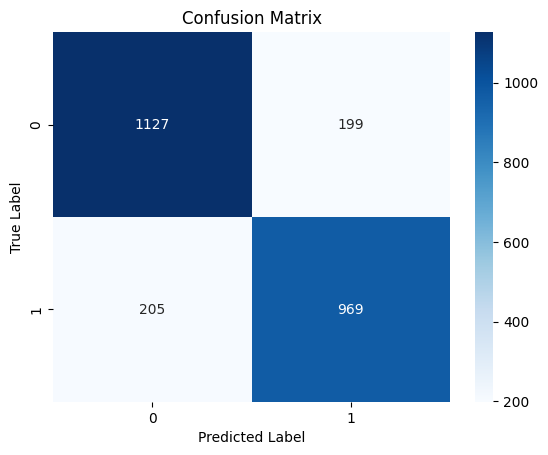

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1326
           1       0.83      0.83      0.83      1174

    accuracy                           0.84      2500
   macro avg       0.84      0.84      0.84      2500
weighted avg       0.84      0.84      0.84      2500



In [74]:
prediction_metrics_gender(cnn, encoded_test, y_test, genders)

In [ ]:
loss_plot (history_autoencoder_gender)

### Age

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X_age_classes, age_categories, test_size=0.2, random_state=42)

X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 3))

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 3))

In [133]:
# binary cross entropy is good for imagprint("Autoencoder Started")
#### AUtoencoder
input = layers.Input(shape=(200, 200, 3))

#valor alto apanha artefactos, e valor baixo nao captura bem as features da imagem
latent_dim = 2000

## Classe 

# Encoder

#didnt increase filter count in encoder and decrease equally in decoder because
#it can lead to overfitting

x = layers.Conv2D(64, (3,3), activation='relu', padding='same', strides = 2)(input)
#x = layers.MaxPooling2D((2,2), padding='same')(x)#dividir imagem por factor de 2
x = layers.Conv2D(32, (3,3), activation='relu', padding='same', strides = 2)(x)#reduziu se nr de filtros para 32 porque foi decidido factor de 32 filtros
#x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(16, (3,3), activation='relu', padding='same', strides = 2)(x)
#x = layers.MaxPooling2D((2,2), padding='same')(x)#25*25*16=10000
x = layers.Flatten()(x)
enc = layers.Dense(latent_dim, activation='relu')(x)

# Decoder

#having conv2D here helps to avoid checkerboard artifacts
#which are alternating points of colors (like checkerboard)
#that are consequence of deconvolutioning an image and cause 
#loss of quality in final reconstruction
#x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(x)

#equivalente a fazer dense layer no fim do encoder e no inicio do decoder
#fazer a layer dense fica um vector
#fazer reshape depois do 2 dense para voltar a ter imagem do vetor criado

x = layers.Dense(25*25*16, activation='relu')(enc)
x = layers.Reshape((25,25,16))(x)
#x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2DTranspose(32, (3, 3), activation="relu", padding="same", strides = 2)(x)
#x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2DTranspose(64, (3,3), activation='relu', padding='same', strides = 2)(x)
#x = layers.UpSampling2D((2,2))(x)
output = layers.Conv2DTranspose(3, (3,3), activation='sigmoid', padding='same', strides = 2)(x)

#maybe use strides in the layers too
#example:
#x = layers.Conv2D(16, (3,3), activation='relu', padding='same', strides = 2)(x)

# Autoencoder
autoencoder = Model(input, output)

# binary cross entropy is good for image feature extraction especially when images are normalized
autoencoder.compile(optimizer="adam", loss="binary_crossentropy",
            metrics=['accuracy'])

autoencoder.summary()#e feature extraction especially when images are normalized

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_44 (Conv2D)          (None, 100, 100, 64)      1792      
                                                                 
 conv2d_45 (Conv2D)          (None, 50, 50, 32)        18464     
                                                                 
 conv2d_46 (Conv2D)          (None, 25, 25, 16)        4624      
                                                                 
 flatten_15 (Flatten)        (None, 10000)             0         
                                                                 
 dense_30 (Dense)            (None, 2000)              20002000  
                                                                 
 dense_31 (Dense)            (None, 10000)             200100

In [134]:
autoencoder.fit(x = X_train, 
                y = X_train,
                epochs = 20,
                shuffle = True,
                batch_size = 32,
                validation_data = (X_test, X_test),)


Epoch 1/2
3/3 [==============================] - 4s 1s/step - loss: 0.6930 - accuracy: 0.6489 - val_loss: 0.6924 - val_accuracy: 0.9983
Epoch 2/2
3/3 [==============================] - 3s 851ms/step - loss: 0.6921 - accuracy: 0.9884 - val_loss: 0.6911 - val_accuracy: 0.9922


In [135]:
new_model = Model(input, enc)
encoded_train = new_model.predict(X_train)
encoded_test = new_model.predict(X_test)

encoded_train = np.asarray(encoded_train)
y_train = np.asarray(y_train)

encoded_test = np.asarray(encoded_test)
y_test = np.asarray(y_test)

1/1 [==============================] - 0s 58ms/step


In [137]:
cnn = Sequential()

# Input shape is (2000,)
cnn.add(layers.Reshape((40, 50, 1), input_shape=encoded_train[0].shape))

cnn.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(Flatten())

cnn.add(Dense(64, activation='relu'))

cnn.add(layers.Dropout(0.5))

#output layer with 2 filters for number of classes the model will choose to do predictions
#and since gender is just binary classification sigmoid is appropriate
#when doing classification for age (wont be binary classification) then softmax is good choice
cnn.add(layers.Dense(6, activation='softmax'))

cnn.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_4 (Reshape)         (None, 40, 50, 1)         0         
                                                                 
 conv2d_47 (Conv2D)          (None, 40, 50, 16)        160       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 20, 25, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 20, 25, 32)        4640      
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 10, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 10, 12, 64)      

In [138]:
cnn.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

history_autoencoder_age = cnn.fit(encoded_train, y_train,
        batch_size=32,
        epochs=20,
        validation_data=(encoded_test, y_test),)

Epoch 1/25
3/3 [==============================] - 1s 130ms/step - loss: 1.7947 - accuracy: 0.1500 - val_loss: 1.8023 - val_accuracy: 0.2500
Epoch 2/25
3/3 [==============================] - 0s 43ms/step - loss: 1.7948 - accuracy: 0.2000 - val_loss: 1.7991 - val_accuracy: 0.2500
Epoch 3/25
3/3 [==============================] - 0s 41ms/step - loss: 1.7500 - accuracy: 0.2875 - val_loss: 1.8014 - val_accuracy: 0.2000
Epoch 4/25
3/3 [==============================] - 0s 40ms/step - loss: 1.7757 - accuracy: 0.2000 - val_loss: 1.8028 - val_accuracy: 0.2000
Epoch 5/25
3/3 [==============================] - 0s 44ms/step - loss: 1.7679 - accuracy: 0.2000 - val_loss: 1.7983 - val_accuracy: 0.1500
Epoch 6/25
3/3 [==============================] - 0s 58ms/step - loss: 1.7417 - accuracy: 0.2625 - val_loss: 1.7947 - val_accuracy: 0.1500
Epoch 7/25
3/3 [==============================] - 0s 44ms/step - loss: 1.7431 - accuracy: 0.2875 - val_loss: 1.7862 - val_accuracy: 0.1500
Epoch 8/25
3/3 [==========

1/1 [==============================] - 0s 98ms/step
MCC:  0.24525573579398632


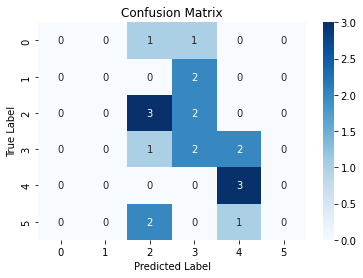

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         2
           2       0.43      0.60      0.50         5
           3       0.29      0.40      0.33         5
           4       0.50      1.00      0.67         3
           5       0.00      0.00      0.00         3

    accuracy                           0.40        20
   macro avg       0.20      0.33      0.25        20
weighted avg       0.25      0.40      0.31        20



c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
prediction_metrics_age(cnn, encoded_test, y_test, y_age_classes)

In [ ]:
loss_plot (history_autoencoder_age)

## Improved CNN

In [ ]:
def CNN (input_shape, output, activation):
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape)) 
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(output, activation=activation))

    model.summary()


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


### Early stoping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Define the model
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=input_shape)) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(output, activation=activation))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model with early stopping
history = model.fit(train_data, epochs=50, batch_size=batch_size, validation_data=val_data, callbacks=[early_stop])


### Early Stoping and Learning Rate Manipulation

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# create the EarlyStopping and ReduceLROnPlateau callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# compile the model with your optimizer and loss function of choice
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model with both callbacks
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stop, reduce_lr])


### Otimizer test

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

# define the optimizers to test
optimizers = [Adam(), SGD(), RMSprop()]

for optimizer in optimizers:
    # build and compile the model
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape = input_shape), 
        tf.keras.layers.MaxPooling2D(pool_size=2),
        tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=2),
        tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(output, activation=activation)
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # train the model and evaluate its performance
    history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stop, reduce_lr])
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f'Test loss with {optimizer}: {loss}')
    print(f'Test accuracy with {optimizer}: {accuracy}')
